![data-x](http://oi64.tinypic.com/o858n4.jpg)

---
# Breakout 2 - Plotting w Matplotlib

**Author list:** Alexander Fred Ojala

**Source:** AY250, UC Berkeley

**License Agreement:** Feel free to do whatever you want with this code

In [1]:
'''
Download data from the link at https://data-x.blog/breakouts
The data files are called: google_data.txt, ny_temps.txt & yahoo_data.txt, place them in your working directory.
Then replicate plot below

In order to obtain all the files directly you can clone the directory by opening the Terminal and running:

git clone https://github.com/alexanderfo/data-x_public

'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
google_data = pd.read_csv('google_data.txt',sep="\t") # Note data seperator is a tab character (\t)
yahoo_data = pd.read_csv('yahoo_data.txt',sep="\t")
ny_temps = pd.read_csv('ny_temps.txt',sep='\t')

<img src="stocks.png">

# Solution example

In [2]:
!ls

data-x_breakout_plotting.ipynb          ny_temps.txt
data-x_breakout_plotting_solution.ipynb stocks.png
data-x_tutorial_plotting.ipynb          yahoo_data.txt
google_data.txt


In [3]:
!head google_data.txt

Modified Julian Date	Stock Value
55463	527.29
55462	513.48
55461	516
55460	513.46
55459	508.28
55456	490.15
55455	481.06
55454	480.64
55453	480.43


## Read in data to Python DataFrames

In [4]:
google_data = pd.read_csv('google_data.txt',sep="\t") # Note data seperator is a tab character (\t)
yahoo_data = pd.read_csv('yahoo_data.txt',sep="\t")
ny_temps = pd.read_csv('ny_temps.txt',sep='\t')

# print shapes of data
print google_data.shape
print yahoo_data.shape
print ny_temps.shape

(1537, 2)
(3639, 2)
(202, 2)


In [5]:
# Change column names for convenience
google_data.columns = ['t','val']
yahoo_data.columns = google_data.columns
ny_temps.columns = ['t','temp']

## Plotting

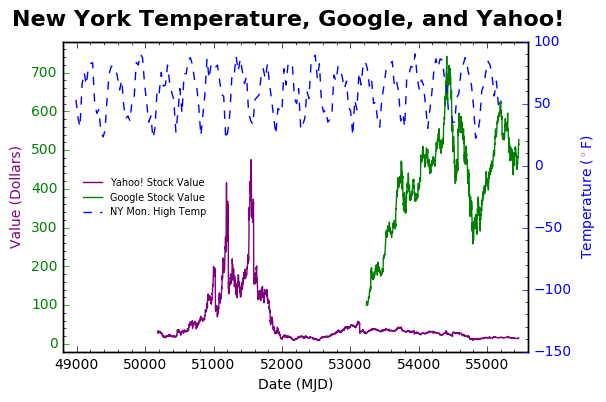

In [6]:
# Create figure, and ax1 subplot
fig, ax1 = plt.subplots()

# Plot stock data
yahoo, = ax1.plot(yahoo_data['t'], yahoo_data["val"], linestyle="-", color="purple", label="Yahoo! Stock Value")
google, = ax1.plot(google_data["t"], google_data["val"],linestyle="-", color="green", label="Google Stock Value")

# Set axis limits, ticks, labels
ax1.set_ylim(-20, 780)
ax1.minorticks_on() # Minor ticks for the axes
ax1.set_xlabel("Date (MJD)")
ax1.set_ylabel("Value (Dollars)",color='purple')
ax1.tick_params(axis='y',colors='green') # change the color of the tick params to green

# Create a second axis on top of the first axis -> right side axis
ax2 = ax1.twinx()

# Plot the temperature data
temps, = ax2.plot(ny_temps["t"], ny_temps["temp"], linestyle="--", color="blue", label="NY Mon. High Temp")

# Set ax2 axis limits, ticks, label
ax2.set_ylim(-150, 100)
ax2.minorticks_on()
ax2.set_ylabel("Temperature ($^\circ$F)",color='blue')
ax2.tick_params(axis='y', colors='blue')

# Set x limit -- do this after plotting on the two axes
ax1.set_xlim(48800, 55600)

# Plot custom legend
plt.figlegend(handles = [yahoo, google, temps], 
              labels = ["Yahoo! Stock Value", "Google Stock Value", "NY Mon. High Temp"],
              loc=[0.13,0.45],fontsize=7,frameon=False,numpoints=1)
     
# Plot the title
fig.suptitle("New York Temperature, Google, and Yahoo!", fontsize=16, fontweight="bold")

plt.show()